In [1]:
!git clone https://github.com/congdanh71298/CS230_Nhom_14_BT2
%cd CS230_Nhom_14_BT2
!pip install datasets==3.5.1

Cloning into 'CS230_Nhom_14_BT2'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 199 (delta 94), reused 162 (delta 57), pack-reused 0 (from 0)
Receiving objects: 100% (199/199), 27.26 KiB | 526.00 KiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/CS230_Nhom_14_BT2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

In [2]:
!python load_checkpoint.py

Retrieving folder contents
Retrieving folder 1mNGIiofr9DWs1GBWlcjhprmSGk5OPtz- convnext
Processing file 1NFE6RrWlX7zP_ztU2_xjDaM72_bruBUB finetuning04.pt
Retrieving folder 1sOZlJeb7ZAT7vf0oGXhDhgeoO-thXQ4K customcnn
Processing file 18c8sy5aW0RkM3IUM8skaj4YcFV_bU5QB finetuning04.pt
Retrieving folder 1ndj3zggD2YtUvGY56dpAuncRofzAUfuA densenet
Processing file 1MG8Jdfyt8TeS6aQplpyZ-HqMIyHQmj9O finetuning14.pt
Retrieving folder 1RyDF4-tus37iaWDn_EWpVOryp0eEskfQ efficientnet
Processing file 1hEgK-xX8Ki2KQ6AQG0Z8Sr8h8rrbcQej finetuning29.pt
Retrieving folder 1vWVvtsrtLXKf3B_J2PmKwUnT5XmsrC3K resnet18
Processing file 1bxhEdERbMSr_qkd5FRrPNIgawdRyz0Se finetuning17.pt
Retrieving folder 1b5hPWXtA7uM4WWTMlVfp5ip3vedtRSLC swin
Processing file 12jPJZoTFyVKbTYffHhC5Gfh8mv_8-AHN finetuning04.pt
Retrieving folder 11JyME2VAqsJ_Jfz3nbjzSC7ea7mXCpck vgg16
Processing file 1SQlXv7w2KtmeySfyQz9xeHmuNLkbl5SY finetuning03.pt
Retrieving folder 1Puy4PkmprsAmNgrIveF5LDQQFDChpbA- vit
Processing file 18MIn5gng_fgh0

In [3]:
!python run_test.py

2025-05-20 14:03:00.447919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 14:03:00.463976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747749780.481912    2019 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747749780.487262    2019 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-20 14:03:00.505679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from IPython.display import Image

def plot_confusion_matrices(csv_file, model_name="model", top_n=10):
    # Load predictions
    df = pd.read_csv(csv_file)
    y_true = df["true_label"].to_numpy()
    y_pred = df["predicted_label"].to_numpy()

    # Compute normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred, normalize="true")

    # --- Plot Full Confusion Matrix ---
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, cmap="Blues", ax=ax, xticklabels=False, yticklabels=False)
    plt.title(f"Normalized Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    full_path = f"confusion_matrix_{model_name}_full.png"
    plt.savefig(full_path)
    plt.close()
    print(f"Saved full confusion matrix to: {full_path}")

    # --- Extract Most Confused Pairs (off-diagonal top N) ---
    num_classes = cm.shape[0]
    confusion_scores = []
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                confusion_scores.append((cm[i][j], i, j))

    confusion_scores.sort(reverse=True)
    top_confused = confusion_scores[:top_n]

    print("\nTop Confused Class Pairs (True → Pred):")
    for val, i, j in top_confused:
        print(f"Class {i} → {j} | Confusion: {val:.2%}")

    # --- Zoomed Confusion Matrix for Top Pairs ---
    top_indices = sorted(set(i for _, i, _ in top_confused) | set(j for _, _, j in top_confused))
    mini_cm = cm[np.ix_(top_indices, top_indices)]

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(mini_cm, annot=True, fmt=".2f", cmap="Reds",
                xticklabels=top_indices, yticklabels=top_indices)
    plt.title(f"Top {top_n} Confused Class Pairs - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    mini_path = f"confusion_matrix_{model_name}_top_confused.png"
    plt.savefig(mini_path)
    plt.close()
    print(f"Saved top confused matrix to: {mini_path}")

In [6]:
models = ["convnext", "vit", "swin", "efficientnet", "densenet", "customcnn", "resnet18", "vgg16"]

for model in models:
  plot_confusion_matrices(f'predictions_{model}.csv', model)

Saved full confusion matrix to: confusion_matrix_convnext_full.png

Top Confused Class Pairs (True → Pred):
Class 61 → 10 | Confusion: 38.00%
Class 47 → 96 | Confusion: 18.00%
Class 47 → 52 | Confusion: 18.00%
Class 52 → 47 | Confusion: 17.00%
Class 90 → 81 | Confusion: 14.00%
Class 72 → 55 | Confusion: 13.00%
Class 62 → 92 | Confusion: 13.00%
Class 30 → 95 | Confusion: 13.00%
Class 13 → 81 | Confusion: 13.00%
Class 99 → 78 | Confusion: 12.00%
Saved top confused matrix to: confusion_matrix_convnext_top_confused.png
Saved full confusion matrix to: confusion_matrix_vit_full.png

Top Confused Class Pairs (True → Pred):
Class 52 → 47 | Confusion: 30.00%
Class 35 → 98 | Confusion: 19.00%
Class 61 → 10 | Confusion: 18.00%
Class 26 → 45 | Confusion: 16.00%
Class 92 → 62 | Confusion: 14.00%
Class 11 → 2 | Confusion: 14.00%
Class 96 → 47 | Confusion: 13.00%
Class 59 → 52 | Confusion: 13.00%
Class 37 → 81 | Confusion: 13.00%
Class 47 → 52 | Confusion: 12.00%
Saved top confused matrix to: confusi

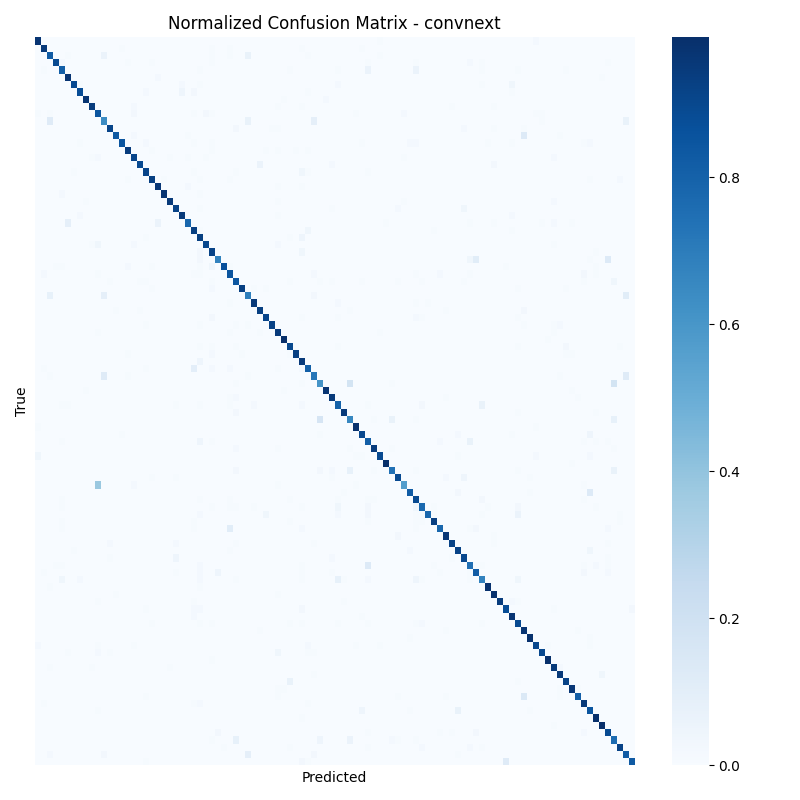

In [7]:
Image("confusion_matrix_convnext_full.png")  # or any other model name

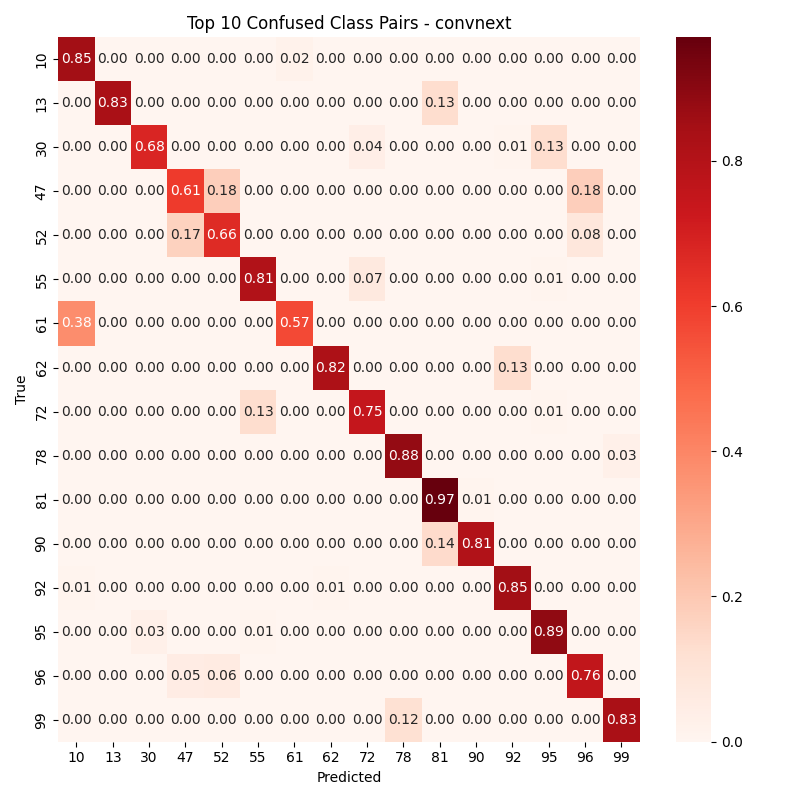

In [8]:
Image("confusion_matrix_convnext_top_confused.png")

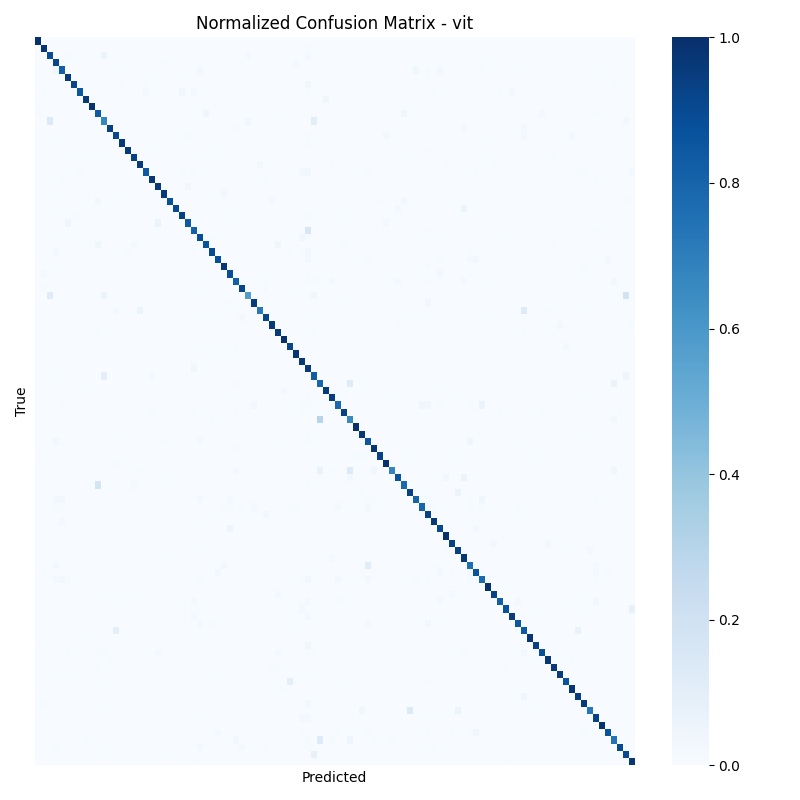

In [9]:
Image("confusion_matrix_vit_full.png")  # or any other model name

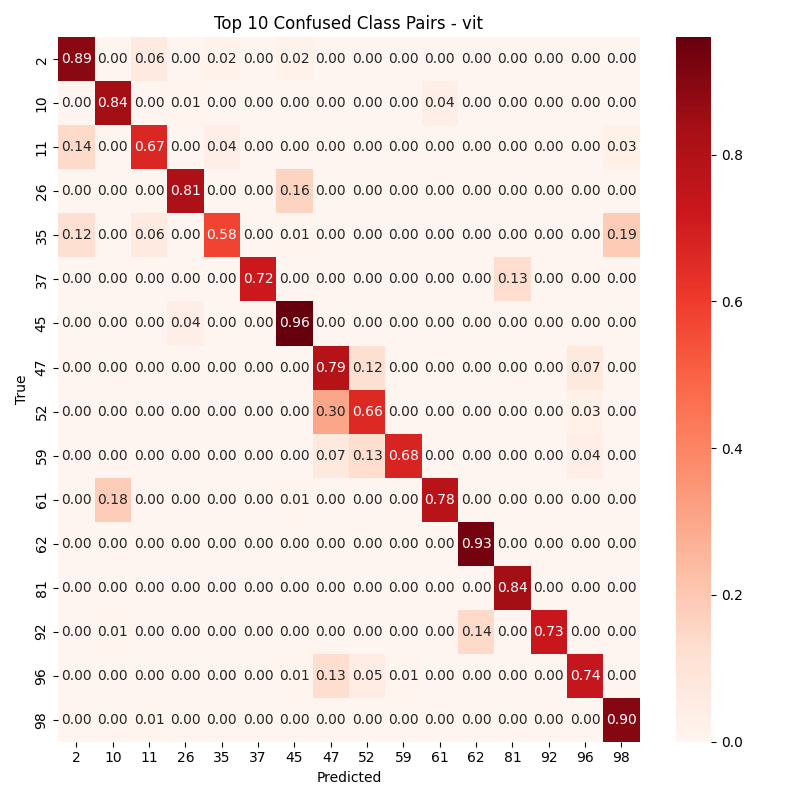

In [10]:
Image("confusion_matrix_vit_top_confused.png")  # or any other model name

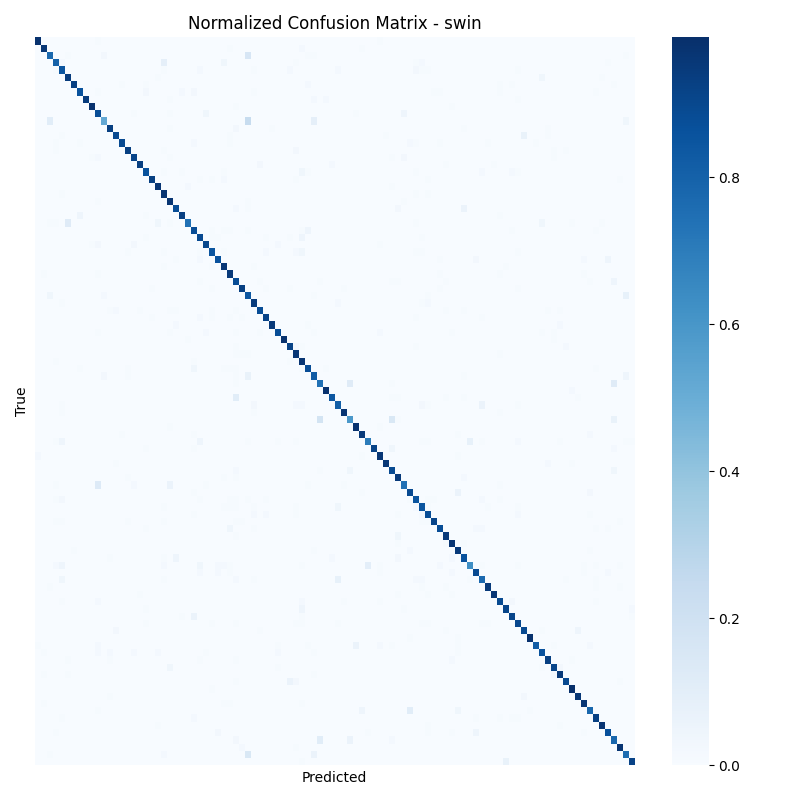

In [11]:
Image("confusion_matrix_swin_full.png")  # or any other model name

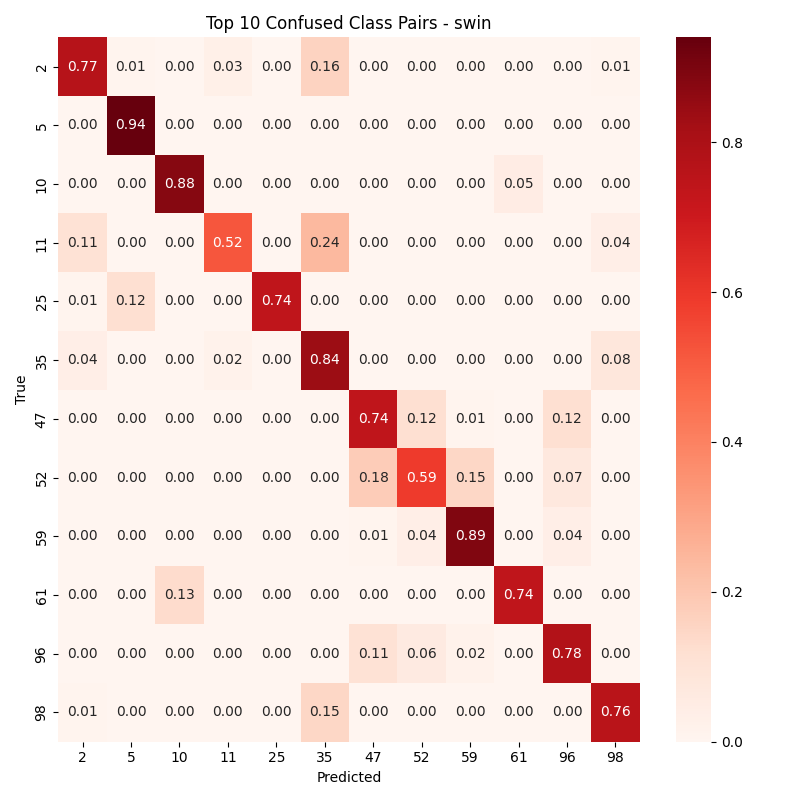

In [12]:
Image("confusion_matrix_swin_top_confused.png")  # or any other model name

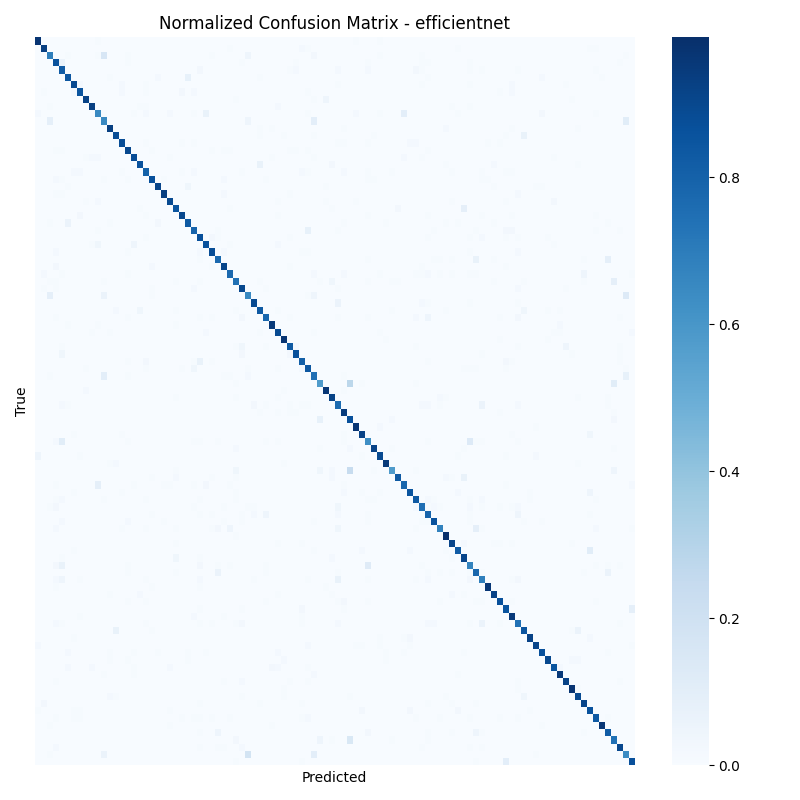

In [13]:
Image("confusion_matrix_efficientnet_full.png")  # or any other model name

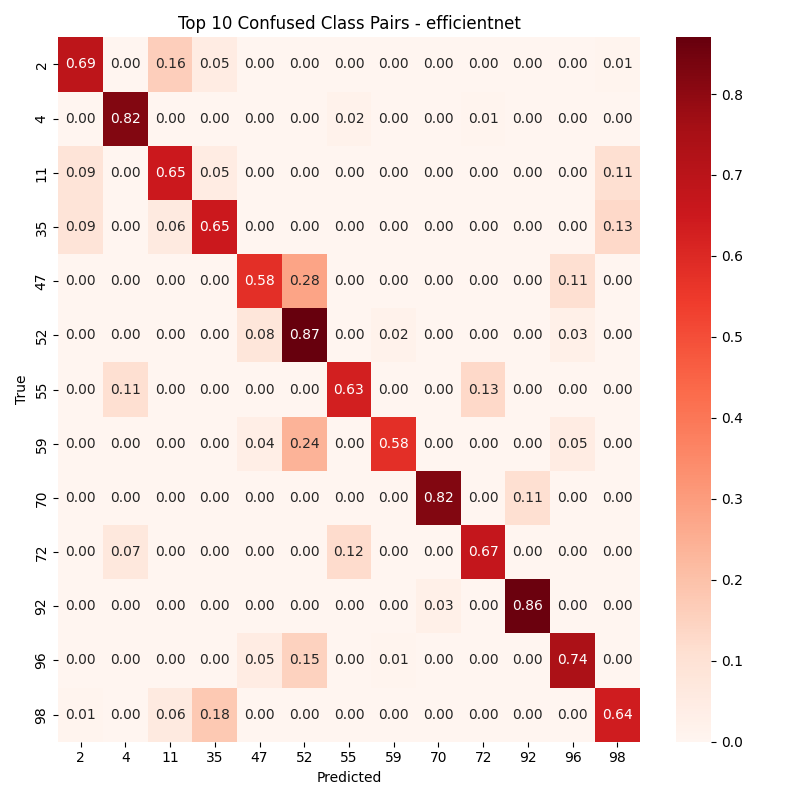

In [14]:
Image("confusion_matrix_efficientnet_top_confused.png")  # or any other model name

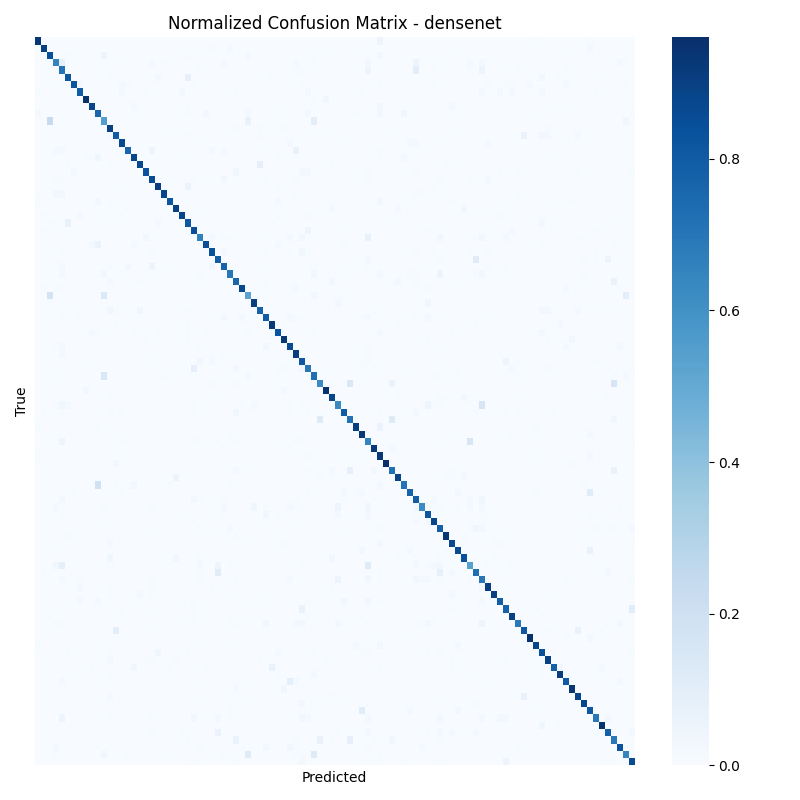

In [15]:
Image("confusion_matrix_densenet_full.png")  # or any other model name

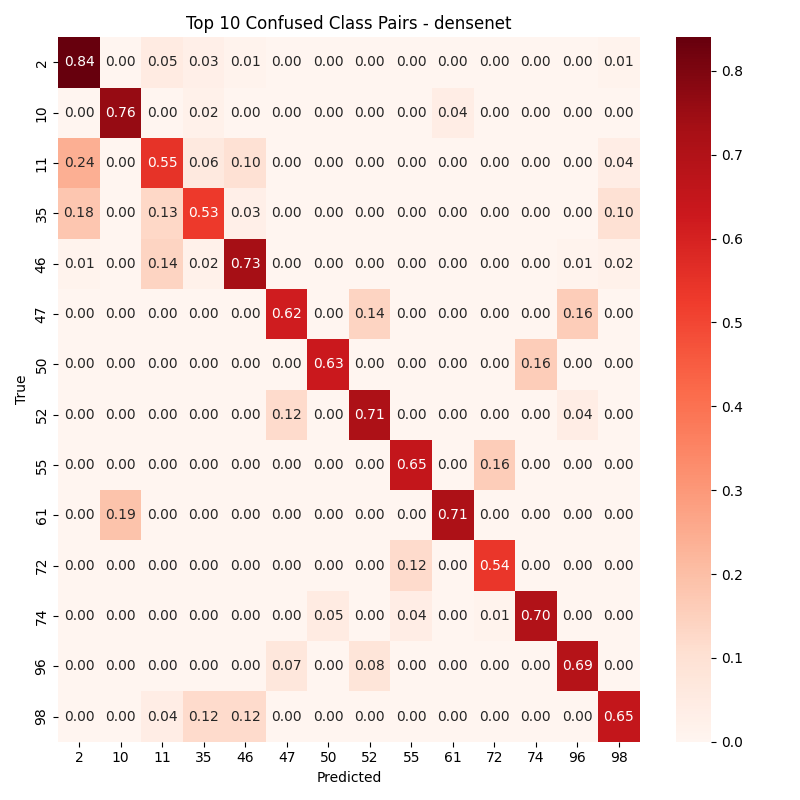

In [16]:
Image("confusion_matrix_densenet_top_confused.png")  # or any other model name

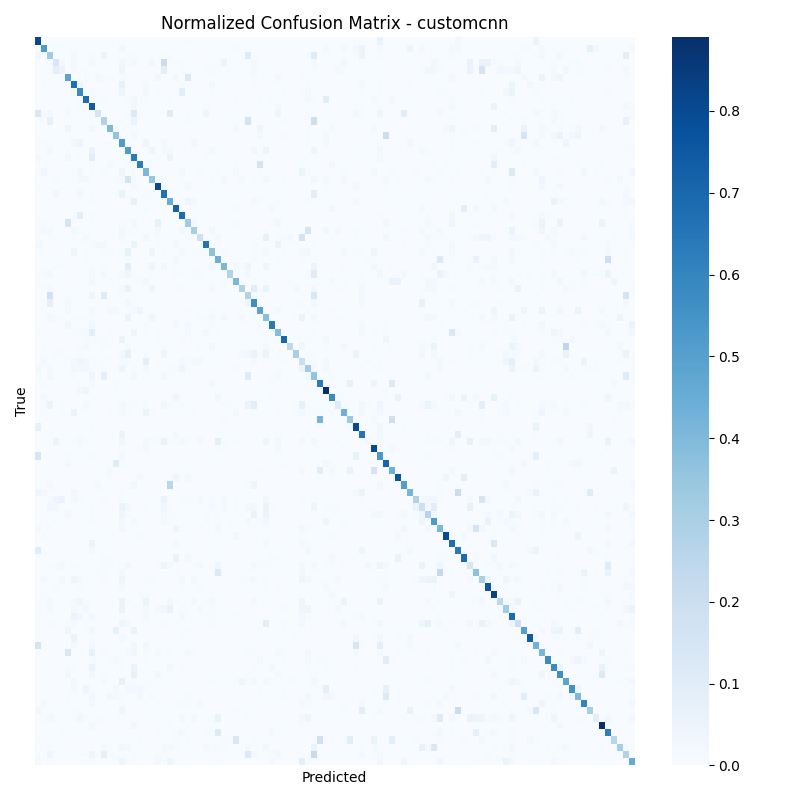

In [17]:
Image("confusion_matrix_customcnn_full.png")  # or any other model name

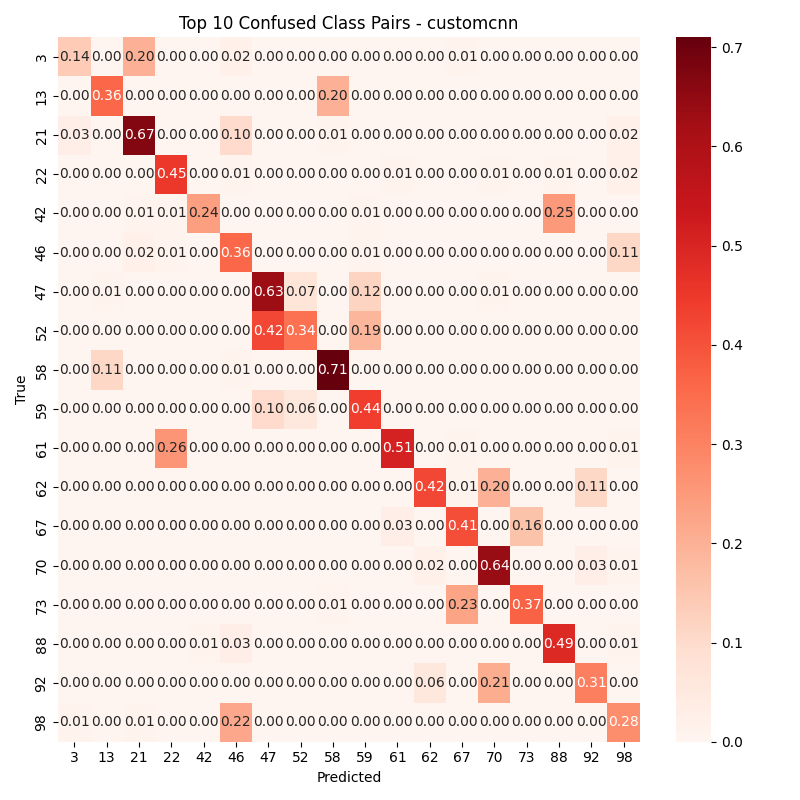

In [18]:
Image("confusion_matrix_customcnn_top_confused.png")  # or any other model name

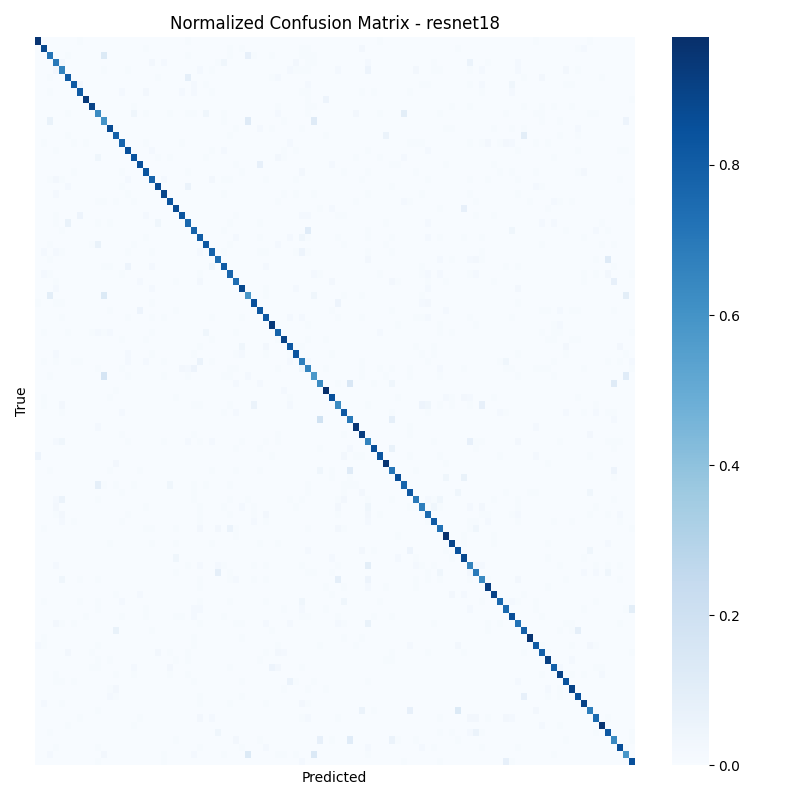

In [19]:
Image("confusion_matrix_resnet18_full.png")  # or any other model name

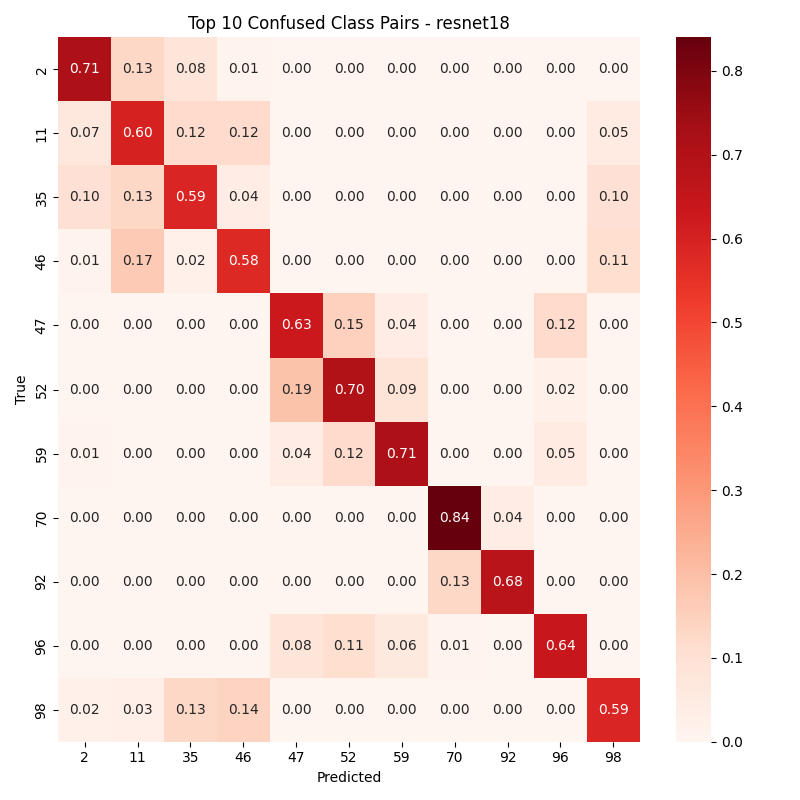

In [20]:
Image("confusion_matrix_resnet18_top_confused.png")  # or any other model name

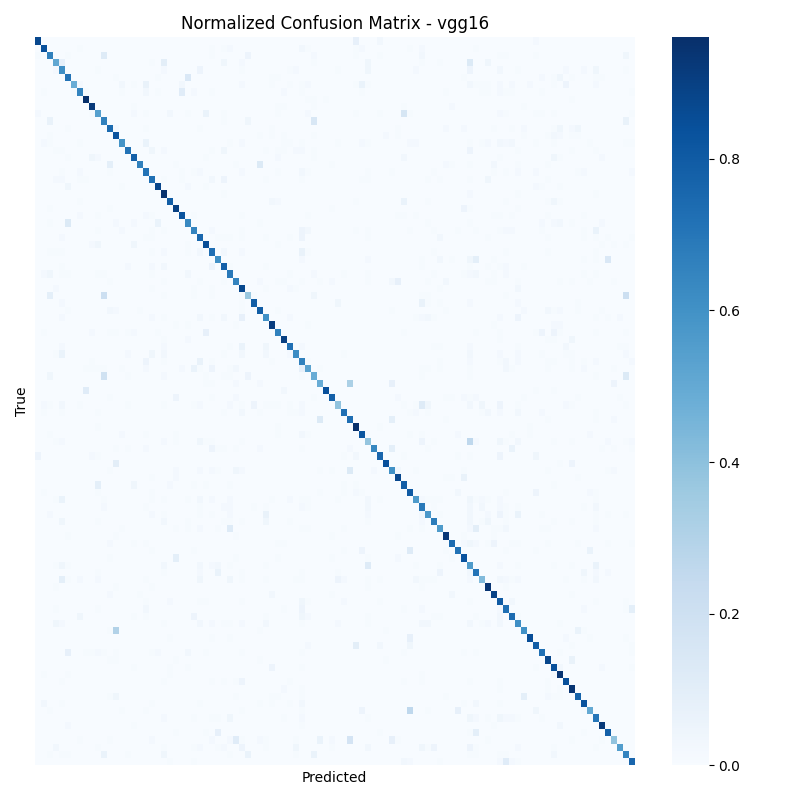

In [21]:
Image("confusion_matrix_vgg16_full.png")  # or any other model name

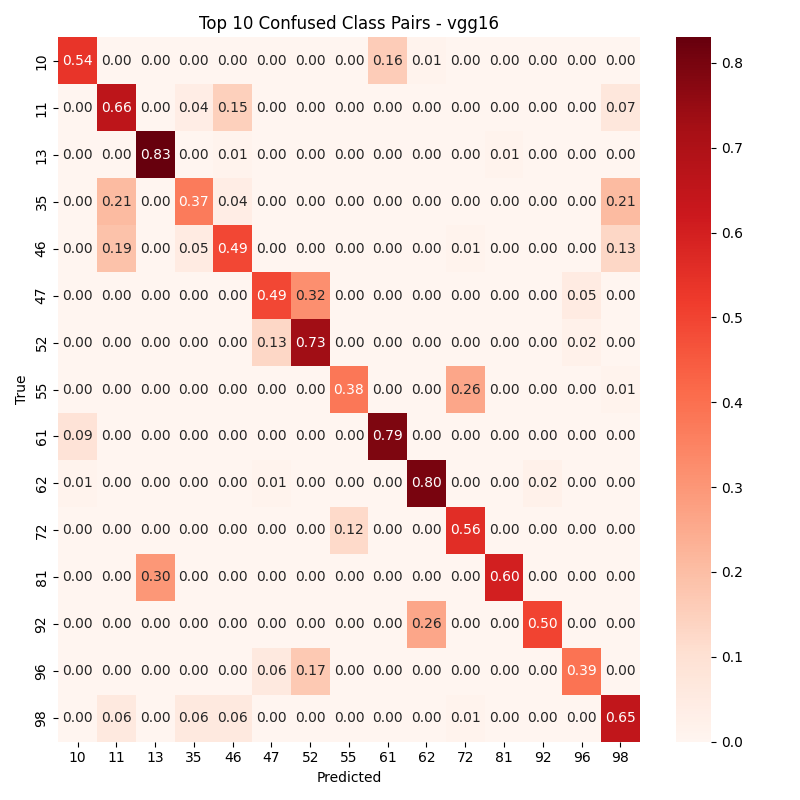

In [22]:
Image("confusion_matrix_vgg16_top_confused.png")  # or any other model name